In [27]:
import pandas as pd  # For cleaning data KG
import seaborn as sns  # Visualization library KG
import matplotlib.pyplot as plt  # Visualization library KG
import math  # For rounding KG
import plotly.express as px # For visualizations KG

In [28]:
# Reading in data set/csv file KG
df = pd.read_csv('/Users/dcsre/Netflix Userbase.csv')

In [29]:
# Printing data frame head KG
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [30]:
# Checking for duplicates KG
df.duplicated().sum()

np.int64(0)

In [31]:
# Checking for null values KG
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

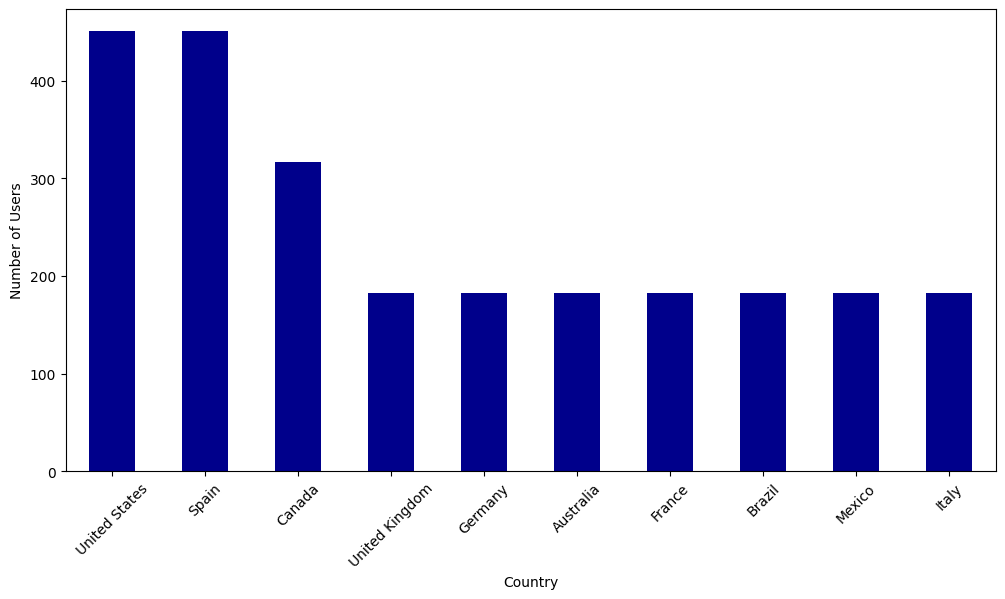

In [32]:
# Visualizing number of users per country KG
plt.figure(figsize=(12, 6))  # Setting plot size KG
df['Country'].value_counts().plot(kind='bar', color='darkblue', edgecolor='black')  # Counting number of users per country and setting plot type and color KG
plt.xlabel('Country')  # Setting x-axis KG
plt.ylabel('Number of Users')  # Setting y-axis KG
plt.xticks(rotation=45)  # Setting rotation for readability KG
plt.show()  # Showing bar chart KG

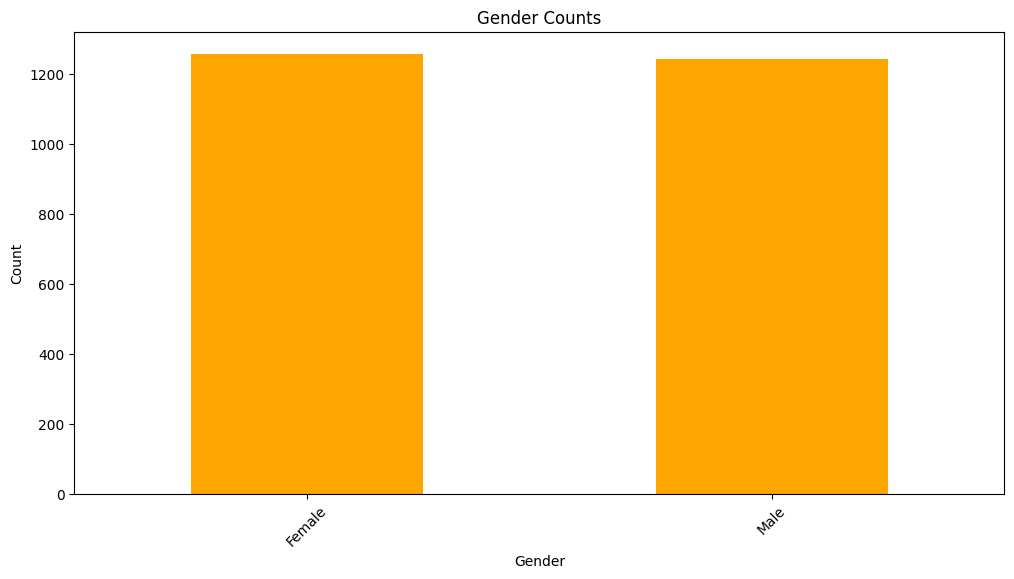

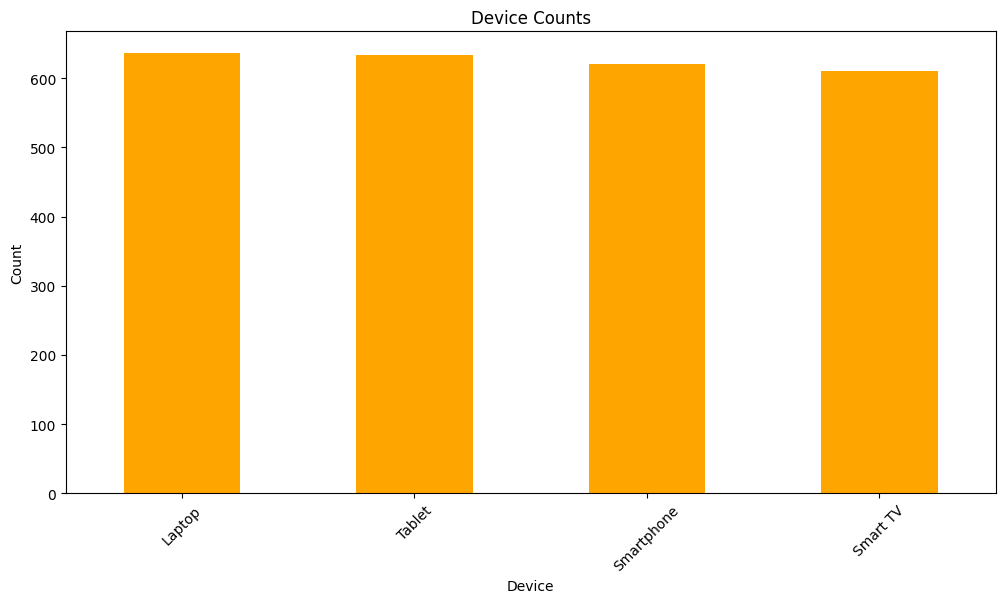

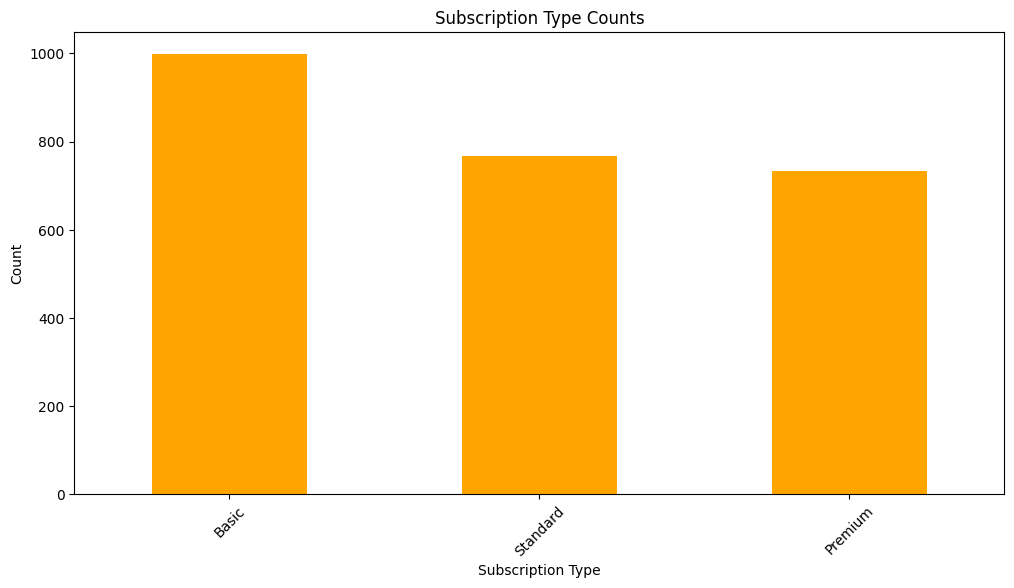

In [75]:
# Creating loop for additional/multiple bar chart data visualizations KG

# Creating dictionary for loop (column and title) KG 
column_titles = {
    'Gender': 'Gender Counts',
    'Device': 'Device Counts',
    'Subscription Type': 'Subscription Type Counts'
}

for column, title in column_titles.items():
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [34]:
# Creating map to show distribution of users KG
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']  # Selecting columns for visualization KG

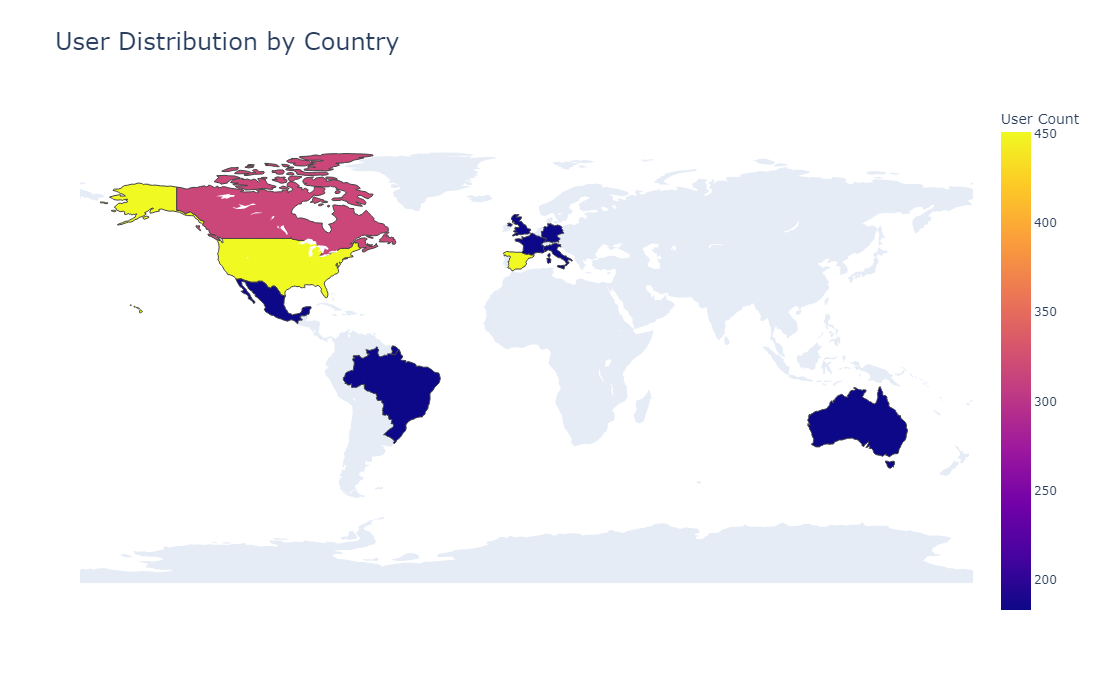

In [35]:
fig = px.choropleth(user_counts_by_country, locations='Country', locationmode='country names', color='User Count',
                    hover_name='Country', title='User Distribution by Country', color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    width=1000,  # Adjusting the width KG
    height=700,  # Adjusting the height KG
    title_font_size=24,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)
fig.show()

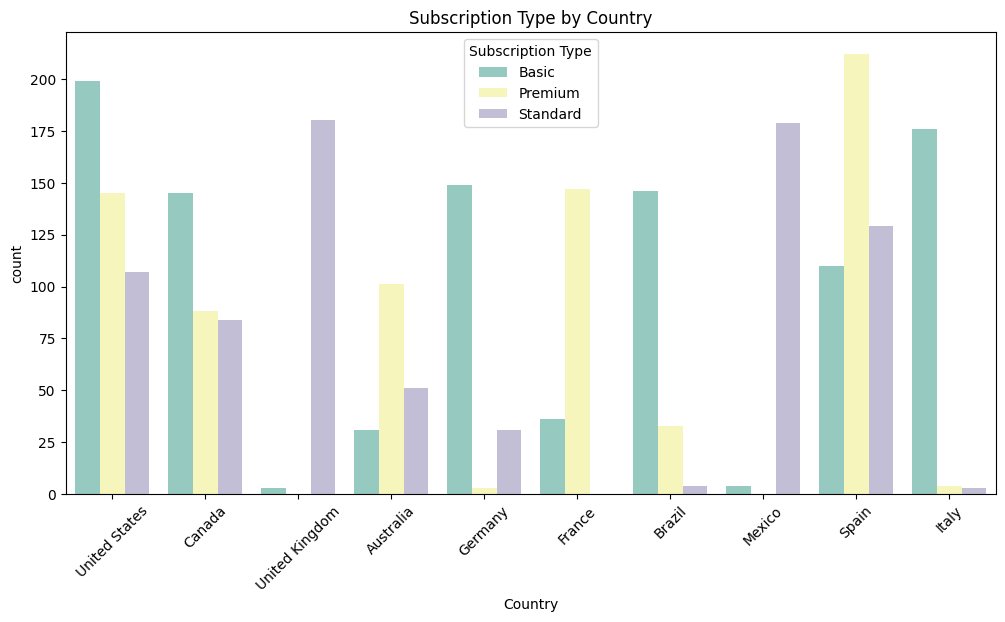

In [36]:
# Visualizing subscription type by country KG
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set3', edgecolor='black')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Creating pivot table for more detailed analysis KG 
subs_by_country = df.pivot_table(index='Country', columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0)

In [38]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


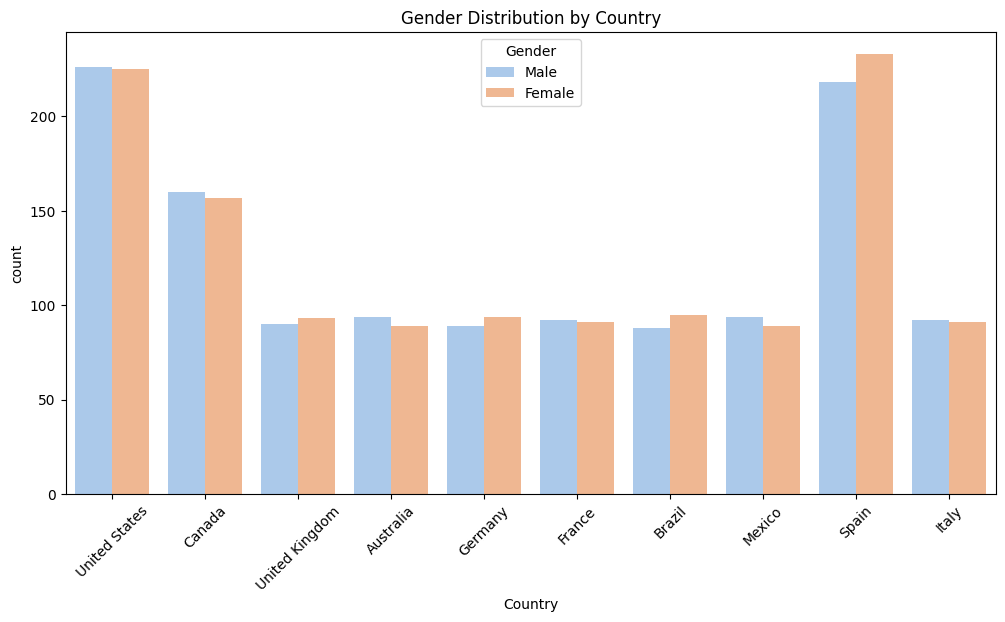

In [45]:
# Visualizing gender distribution by country KG
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel', edgecolor='black')
plt.title('Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Creating pivot table for more detailed analysis KG 
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [48]:
# Combining pivot tables KG
subs_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type', 'Gender'],
                                        values='User ID', aggfunc='count', fill_value=0)
subs_by_country_gender

Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

In [49]:
# Alternative variation of combined pivot table KG
subs_by_country_gender2 = df.pivot_table(index=['Country','Gender'], columns='Subscription Type',
                                         values='User ID', aggfunc='count', fill_value=0)
subs_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

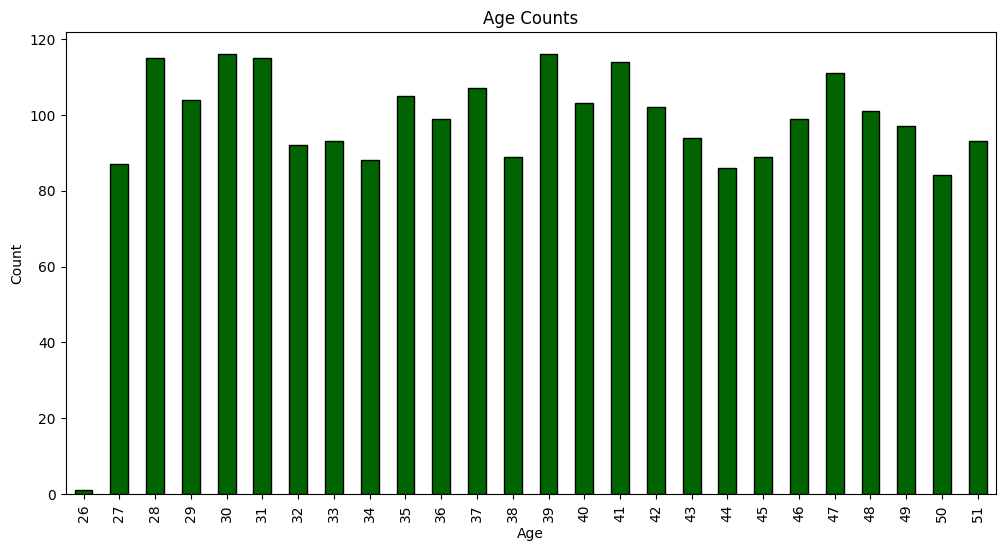

In [51]:
# Visualizing how many users of different ages KG
plt.figure(figsize=(12, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [69]:
# Printing data frame head KG
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


In [54]:
# Analyzing duration between join date and last payment subscription KG
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [59]:
# Calculating duration in days rather than months KG
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days


In [60]:
# Dividing number of days by 30 and then rounding for more accuracy KG
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x / 30))


In [62]:
average_duration = df['Duration Months'].mean()

In [63]:
print(f"Average Duration: {average_duration}")

Average Duration: 10.7808


In [68]:
# Calculating revenue, LTV = life time value KG
df['LTV'] = df['Monthly Revenue'] * df['Duration Months']

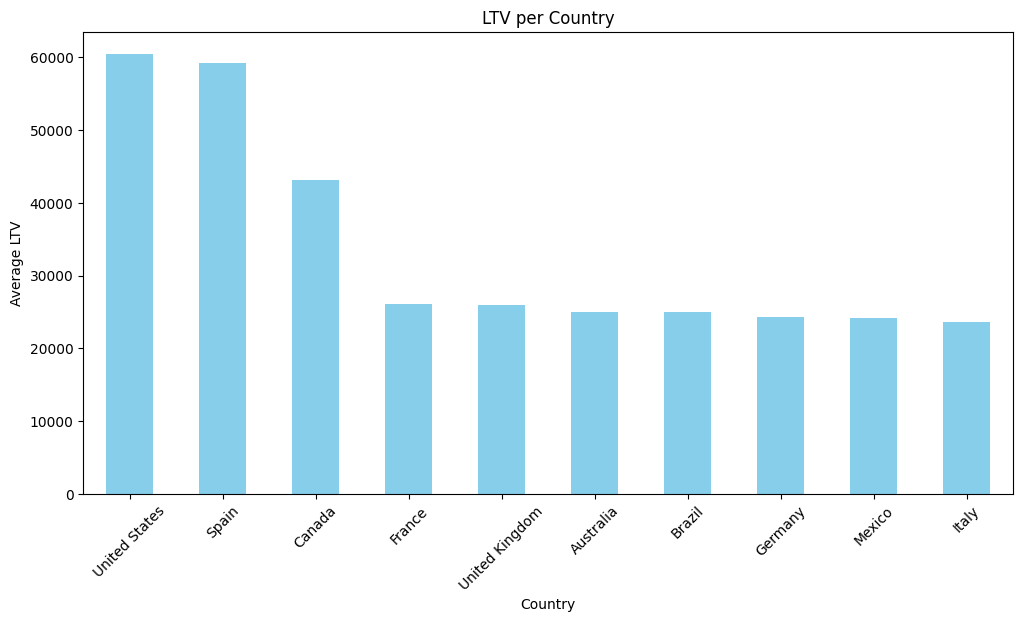

In [70]:
# Visualizing total revenue for each country KG
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ltv_per_country_sum.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

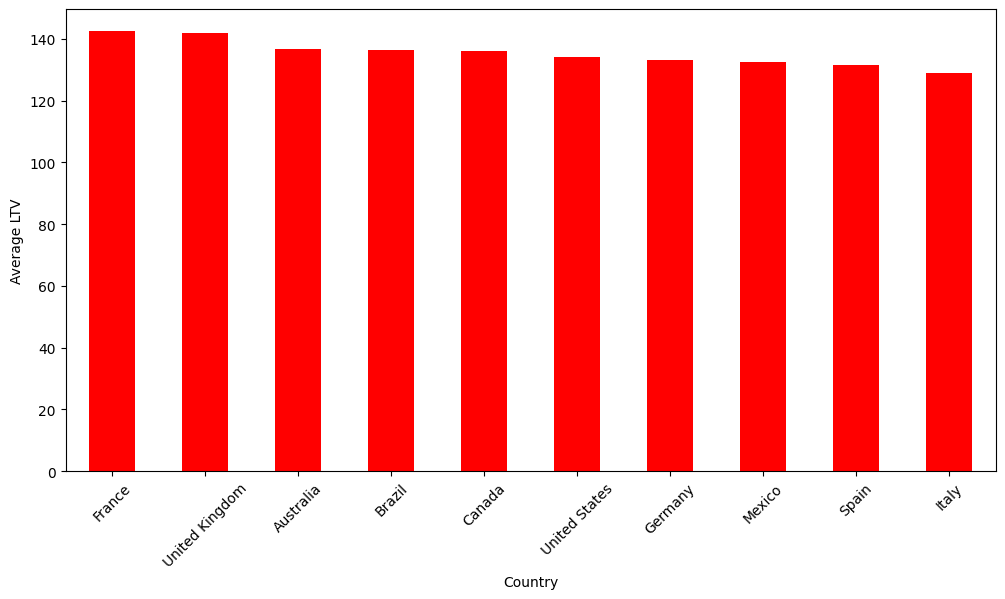

In [71]:
# Visualizing average revenue for each country KG
ltv_per_country = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ltv_per_country.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

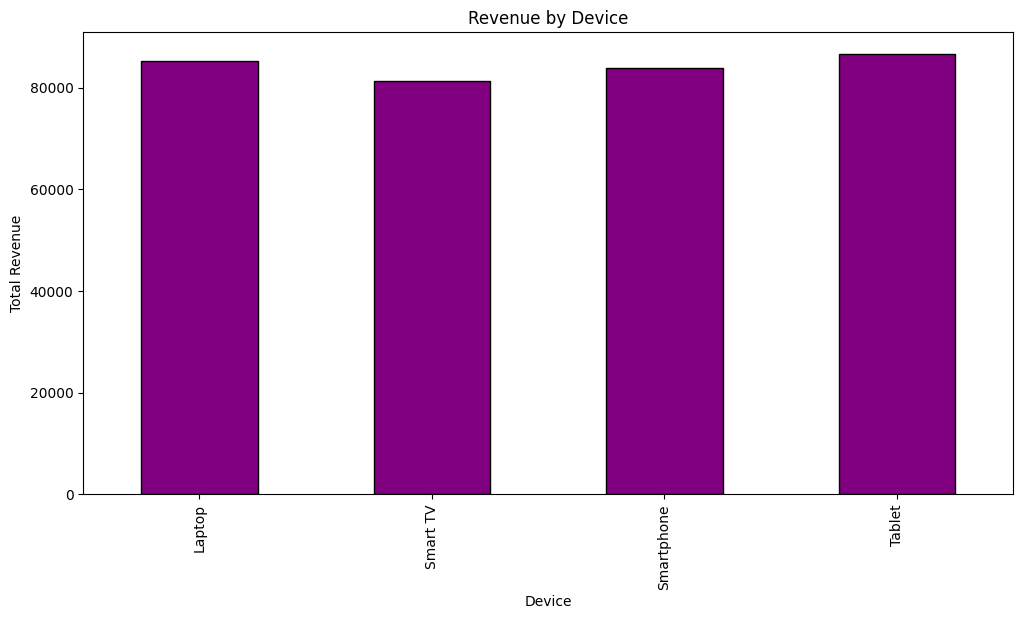

In [72]:
# Visualizing revenue per device KG
revenue_by_device = df.groupby('Device')['LTV'].sum()

plt.figure(figsize=(12, 6))
revenue_by_device.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue')
plt.show()


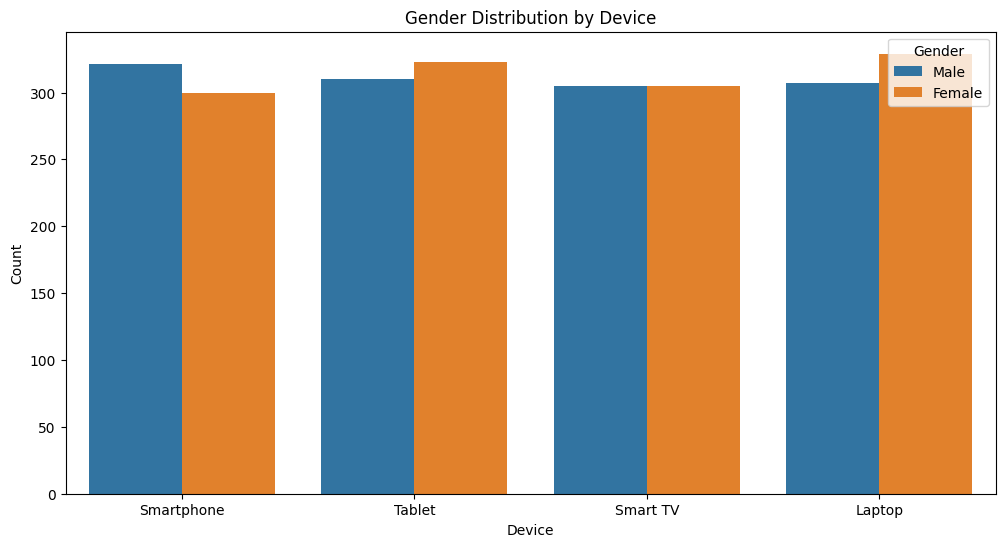

In [73]:
# Visualizing gender distribution by device KG
plt.figure(figsize=(12, 6))
sns.countplot(x='Device', hue='Gender', data=df, edgecolor='black')
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()